In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("DataSample.xlsx")

In [3]:
data_backup=data.copy()

In [4]:
data.head(5)

,pan,pincode,gender,monthlyIncome,Age,city_name,Emp_Type,score,amountPastDue,creditLimitAmount,currentBalance,dateClosed,dateofLastPayment,openDate,dateReported,highCredit,Credit,paymentHistoryProfile,accountTypeName,accountStatusName
0,57cd4dd8c3295123551c9eadc823dfc1,431542.0,MALE,NaN,28.5,Parbhani,NaN,620,0,NaN,0,2019-12-13,2019-12-13,2019-11-28,2019-12-31,4500.0,NaN,"0,0,",Personal Loan,Closed
1,57cd4dd8c3295123551c9eadc823dfc1,431542.0,MALE,NaN,28.5,Parbhani,NaN,620,5146,NaN,1000,NaN,2019-11-18,2019-11-02,2020-12-04,2000.0,NaN,"363,345,328,294,258,242,0,185,163,115,87,41,13,",Personal Loan,Suit filed
2,57cd4dd8c3295123551c9eadc823dfc1,431542.0,MALE,NaN,28.5,Parbhani,NaN,620,5191,NaN,5191,NaN,NaN,2019-11-13,2020-11-30,5000.0,NaN,"352,322,291,261,230,199,169,138,108,77,48,17,0,",Personal Loan,Active
3,57cd4dd8c3295123551c9eadc823dfc1,431542.0,MALE,NaN,28.5,Parbhani,NaN,620,0,NaN,0,2020-03-14,2020-03-14,2019-03-18,2020-05-31,12500.0,NaN,"0,0,0,53,55,54,54,54,54,24,24,0,0,0,0,",Consumer Loan,Closed
4,57cd4dd8c3295123551c9eadc823dfc1,431542.0,MALE,NaN,28.5,Parbhani,NaN,620,0,NaN,0,2019-11-13,2019-11-13,2019-10-12,2019-11-30,4000.0,NaN,"0,0,",Personal Loan,Closed


In [5]:
data.drop(columns='pincode',inplace=True)

In [6]:
data.columns

Index(['pan', 'gender', 'monthlyIncome', 'Age', 'city_name', 'Emp_Type',
       'score', 'amountPastDue', 'creditLimitAmount', 'currentBalance',
       'dateClosed', 'dateofLastPayment', 'openDate', 'dateReported',
       'highCredit', 'Credit', 'paymentHistoryProfile', 'accountTypeName',
       'accountStatusName'],
      dtype='object')

In [7]:
data.Age=list(map(lambda x: None if x>90 else x,data.Age))

In [8]:
data.Age=list(map(lambda x: None if x<18 else x, data.Age))

In [9]:
customer_details=data[['pan','gender','monthlyIncome','Age','city_name','Emp_Type','score']].copy()
customer_details.drop_duplicates(inplace=True)
customer_details.reset_index(inplace=True,drop=True)

In [10]:
customer_details

,pan,gender,monthlyIncome,Age,city_name,Emp_Type,score
0,57cd4dd8c3295123551c9eadc823dfc1,MALE,NaN,28.5,Parbhani,NaN,620
1,f90cddc2d229d56ce4e6b8faff597f02,MALE,90000.0,39.0,Bengaluru,Salaried,787
2,72fabfcba4514de189a4377a46aa13ec,MALE,20000.0,34.2,Panipat,Salaried,781
3,146a853415e7279c8e9e2daa2983eb47,MALE,0.0,27.4,Vadodara,NaN,742
4,1287e1573d30cee4d477278e06b06332,MALE,2500000.0,42.1,Vadodara,Self Employment Business,657
...,...,...,...,...,...,...,...
79995,9a88a8527614ed553977b18019602118,MALE,30000.0,33.0,Lucknow,Salaried,730
79996,8cd13d369347418a52d8a66ec25b798b,MALE,12000.0,25.5,Gwalior,Salaried,734
79997,cdddba8be5261bd3d4d03e4611da5a93,MALE,35000.0,35.5,Mangalore,Salaried,744
79998,aa68f1f442672471655b3f2b42190b10,MALE,416666.0,25.0,Jodhpur,Self Employed,729


In [11]:
customer_details.city_name.value_counts().head(40)

Delhi            4036
Bengaluru        3172
Hyderabad        2598
Mumbai           2579
Pune             2204
Chennai          1833
Thane            1298
Ahmedabad        1197
Kolkata          1186
Surat            1172
Jaipur           1053
Indore            823
Gurgaon           736
Coimbatore        728
Nagpur            662
Nashik            660
Lucknow           650
Aurangabad        630
Ghaziabad         584
Patna             574
Guntur            514
Vadodara          513
Ludhiana          486
Faridabad         468
Visakhapatnam     463
Warangal          463
Navi Mumbai       460
Bhopal            452
Solapur           447
Ahmednagar        441
Noida             436
Rajkot            402
Karimnagar        396
Varanasi          351
Chittoor          343
Vijayawada        341
Jalgaon           332
Nellore           328
Bhubaneswar       326
Tiruppur          324
Name: city_name, dtype: int64

In [12]:
customer_details.city_name=customer_details.city_name.replace({'Bangalore':'Tier 1','Chennai':'Tier 1','Delhi':'Tier 1',
                                                               'Hyderabad':'Tier 1','Kolkata':'Tier 1','Mumbai':'Tier 1','Navi Mumbai':'Tier 1',
                                                               'Ahmedabad':'Tier 1','Pune':'Tier 1','Bengaluru':'Tier 1'})

In [13]:
dict1={'Agra':'Tier 2',
'Ajmer':'Tier 2',
'Aligarh':'Tier 2',
'Amravati':'Tier 2',
'Amritsar':'Tier 2',
'Asansol':'Tier 2',
'Aurangabad':'Tier 2',
'Bareilly':'Tier 2',
'Belgaum':'Tier 2',
'Bhavnagar':'Tier 2',
'Bhiwandi':'Tier 2',
'Bhopal':'Tier 2',
'Bhubaneswar':'Tier 2',
'Bikaner':'Tier 2',
'Bilaspur':'Tier 2',
'Bokaro Steel City':'Tier 2',
'Chandigarh':'Tier 2',
'Coimbatore':'Tier 2',
'Cuttack':'Tier 2',
'Dehradun':'Tier 2',
'Dhanbad':'Tier 2',
'Bhilai':'Tier 2',
'Durgapur':'Tier 2',
'Erode':'Tier 2',
'Faridabad':'Tier 2',
'Firozabad':'Tier 2',
'Ghaziabad':'Tier 2',
'Gorakhpur':'Tier 2',
'Gulbarga':'Tier 2',
'Guntur':'Tier 2',
'Gwalior':'Tier 2',
'Gurgaon':'Tier 2',
'Guwahati':'Tier 2',
'Hamirpur':'Tier 2',
'Hubli–Dharwad':'Tier 2',
'Indore':'Tier 2',
'Jabalpur':'Tier 2',
'Jaipur':'Tier 2',
'Jalandhar':'Tier 2',
'Jammu':'Tier 2',
'Jamnagar':'Tier 2',
'Jamshedpur':'Tier 2',
'Jhansi':'Tier 2',
'Jodhpur':'Tier 2',
'Kakinada':'Tier 2',
'Kannur':'Tier 2',
'Kanpur':'Tier 2',
'Kochi':'Tier 2',
'Kolhapur':'Tier 2',
'Kollam':'Tier 2',
'Kozhikode':'Tier 2',
'Kurnool':'Tier 2',
'Ludhiana':'Tier 2',
'Lucknow':'Tier 2',
'Madurai':'Tier 2',
'Malappuram':'Tier 2',
'Mathura':'Tier 2',
'Goa':'Tier 2',
'Mangalore':'Tier 2',
'Meerut':'Tier 2',
'Moradabad':'Tier 2',
'Mysore':'Tier 2',
'Nagpur':'Tier 2',
'Nanded':'Tier 2',
'Nashik':'Tier 2',
'Nellore':'Tier 2',
'Noida':'Tier 2',
'Patna':'Tier 2',
'Pondicherry':'Tier 2',
'Purulia Prayagraj':'Tier 2',
'Raipur':'Tier 2',
'Rajkot':'Tier 2',
'Rajahmundry':'Tier 2',
'Ranchi':'Tier 2',
'Rourkela':'Tier 2',
'Salem':'Tier 2',
'Sangli':'Tier 2',
'Shimla':'Tier 2',
'Siliguri':'Tier 2',
'Solapur':'Tier 2',
'Srinagar':'Tier 2',
'Surat':'Tier 2',
'Thiruvananthapuram':'Tier 2',
'Thrissur':'Tier 2',
'Tiruchirappalli':'Tier 2',
'Tiruppur':'Tier 2',
'Thane':'Tier 2',       
'Ujjain':'Tier 2',
'Bijapur':'Tier 2',
'Vadodara':'Tier 2',
'Varanasi':'Tier 2',
'Vasai-Virar City':'Tier 2',
'Vijayawada':'Tier 2',
'Visakhapatnam':'Tier 2',
'Vellore':'Tier 2',
'Warangal':'Tier 2'}

In [14]:
customer_details.city_name=customer_details.city_name.replace(dict1)

In [15]:
customer_details.city_name.value_counts()

Tier 2        26754
Tier 1        19265
Ahmednagar      441
Karimnagar      396
Chittoor        343
              ...  
DHANGARDHA        1
Itanagar          1
Ukhrul            1
Amareli           1
Tawang            1
Name: city_name, Length: 651, dtype: int64

In [16]:
for i in customer_details.city_name.unique():
    if(i=='Tier 1'):
        pass
    elif(i=='Tier 2'):
        pass
    else:
        customer_details.city_name=customer_details.city_name.replace({i:'Tier 3'})

In [17]:
customer_details.city_name.value_counts()

Tier 3    33981
Tier 2    26754
Tier 1    19265
Name: city_name, dtype: int64

In [18]:
customer_details.gender.value_counts()

MALE      74540
FEMALE     5460
Name: gender, dtype: int64

In [19]:
data.drop(columns='gender',inplace=True)

**We have Very less Female Customers**

In [20]:
customer_details.isnull().sum()

pan                  0
gender               0
monthlyIncome     2310
Age                 34
city_name            0
Emp_Type         13616
score                0
dtype: int64

In [21]:
customer_details.Age.describe()

count    79966.000000
mean        34.569198
std          9.034676
min         18.000000
25%         28.000000
50%         32.600000
75%         39.300000
max         89.600000
Name: Age, dtype: float64

In [22]:
customer_details.Emp_Type.unique()

array([nan, 'Salaried', 'Self Employment Business', 'Self Employed'],
      dtype=object)

In [23]:
#Replacing Null values with category 'Unkown'
data.monthlyIncome=list(map(lambda x: None if x==0 else x, data.monthlyIncome))
data.Emp_Type=data.Emp_Type.fillna('Unknown')

customer_details.monthlyIncome=list(map(lambda x: None if x==0 else x, customer_details.monthlyIncome))
customer_details.Emp_Type=customer_details.Emp_Type.fillna('Unknown')

In [24]:
data[data.monthlyIncome<10000.0]

,pan,monthlyIncome,Age,city_name,Emp_Type,score,amountPastDue,creditLimitAmount,currentBalance,dateClosed,dateofLastPayment,openDate,dateReported,highCredit,Credit,paymentHistoryProfile,accountTypeName,accountStatusName
245,0136509b94e2d21beea714683697345c,1541.0,21.2,Ujjain,Self Employment Business,587,0,NaN,0,2020-11-27,2020-11-27,2020-11-13,2020-11-30,5500.0,NaN,"0,",Personal Loan,Closed
246,0136509b94e2d21beea714683697345c,1541.0,21.2,Ujjain,Self Employment Business,587,764,NaN,61383,NaN,2020-10-31,2020-07-13,2020-10-31,60000.0,NaN,"0,0,0,0,",Other,Active
247,0136509b94e2d21beea714683697345c,1541.0,21.2,Ujjain,Self Employment Business,587,5637,NaN,505637,NaN,2020-10-31,2020-01-18,2020-10-31,500000.0,NaN,"60,60,0,0,0,0,0,0,0,0,",Other,Active
248,0136509b94e2d21beea714683697345c,1541.0,21.2,Ujjain,Self Employment Business,587,2934,NaN,51940,NaN,2020-10-31,2020-04-30,2020-10-31,50000.0,NaN,"60,0,0,0,0,0,0,",Other,Active
249,0136509b94e2d21beea714683697345c,1541.0,21.2,Ujjain,Self Employment Business,587,0,NaN,6160,NaN,NaN,2020-11-27,2020-11-30,6160.0,NaN,"0,",Personal Loan,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782723,c7253c5e2bb3d17afc6bd3d82c09554a,1666.0,39.2,Jaipur,Self Employment Business,772,0,NaN,224385,NaN,2015-03-23,2013-06-28,2020-10-31,330000.0,NaN,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,240,240,240,24...",Commercial Vehicle Loan,Suit filed (Wilful default)
782724,c7253c5e2bb3d17afc6bd3d82c09554a,1666.0,39.2,Jaipur,Self Employment Business,772,0,NaN,0,2020-05-12,NaN,2020-02-26,2020-08-31,100000.0,NaN,"0,0,0,0,26,1,0,",Personal Loan,Closed
782725,c7253c5e2bb3d17afc6bd3d82c09554a,1666.0,39.2,Jaipur,Self Employment Business,772,0,NaN,1311959,NaN,2020-10-10,2020-01-31,2020-10-31,1530000.0,NaN,"0,0,0,0,0,0,0,0,0,0,",Housing Loan,Active
782736,ba60f1520a43fa1e6438393f7593e39d,5833.0,23.0,Burdwan,Self Employment Business,764,0,NaN,28099,NaN,NaN,2019-04-29,2020-10-31,55000.0,NaN,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,",Two-Wheeler Loan,Active


In [25]:
customer_details.isnull().sum()

pan                  0
gender               0
monthlyIncome    15771
Age                 34
city_name            0
Emp_Type             0
score                0
dtype: int64

In [26]:
data.isnull().sum()

pan                           0
monthlyIncome            134064
Age                         217
city_name                     0
Emp_Type                      0
score                         0
amountPastDue                 0
creditLimitAmount        705859
currentBalance                0
dateClosed               279628
dateofLastPayment        131096
openDate                      0
dateReported                  0
highCredit                 9146
Credit                   782846
paymentHistoryProfile         0
accountTypeName               0
accountStatusName             0
dtype: int64

In [27]:
customer_details.score.min()

1

In [28]:
customer_details.score.max()

838

<AxesSubplot:xlabel='score', ylabel='Density'>

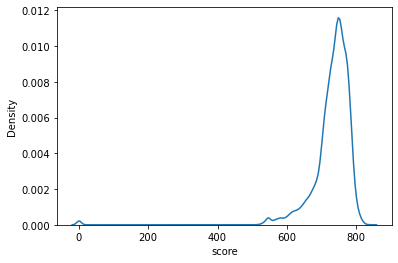

In [29]:
sns.kdeplot(customer_details.score)

In [30]:
customer_details.score.describe()

count    80000.000000
mean       729.262475
std         63.511979
min          1.000000
25%        713.000000
50%        741.000000
75%        763.000000
max        838.000000
Name: score, dtype: float64

<AxesSubplot:xlabel='monthlyIncome', ylabel='Density'>

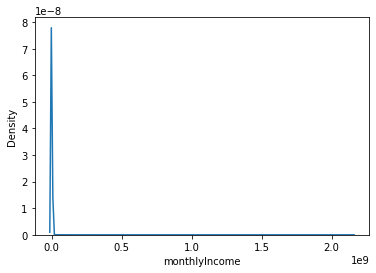

In [31]:
sns.kdeplot(customer_details.monthlyIncome)

In [32]:
customer_details.monthlyIncome=list(map(lambda x: None if x<500 else x ,customer_details.monthlyIncome))

In [33]:
customer_details.monthlyIncome.describe()

count    6.393300e+04
mean     9.910971e+05
std      4.047292e+07
min      5.000000e+02
25%      1.666600e+04
50%      2.500000e+04
75%      4.200000e+04
max      2.147484e+09
Name: monthlyIncome, dtype: float64

In [34]:
(42000-16666)*1.5+(42000)

80001.0

In [35]:
customer_details[customer_details.monthlyIncome>80000]

,pan,gender,monthlyIncome,Age,city_name,Emp_Type,score
1,f90cddc2d229d56ce4e6b8faff597f02,MALE,90000.0,39.0,Tier 1,Salaried,787
4,1287e1573d30cee4d477278e06b06332,MALE,2500000.0,42.1,Tier 2,Self Employment Business,657
20,62099d0747eff8b2454a49435a41235f,MALE,416666.0,25.2,Tier 3,Self Employment Business,771
30,aeea02863f681acf8d35d1337b615158,FEMALE,130000.0,21.7,Tier 2,Salaried,707
83,693058564004d1b6b1fad52fbe021b49,MALE,100000.0,31.1,Tier 3,Salaried,773
...,...,...,...,...,...,...,...
79947,4801ae4f52f9fcfa684fcdee8351d169,MALE,86000.0,20.7,Tier 3,Salaried,744
79953,c54aa374cce9ad0b578722fe80803e77,MALE,1083333.0,29.5,Tier 2,Self Employed,742
79980,850cb0d2026801ccb7534a5e6a1a0ba3,MALE,166666.0,33.0,Tier 2,Self Employed,725
79990,0b8d02776df217402b971cf38a675016,MALE,260000.0,30.2,Tier 3,Salaried,702


In [36]:
customer_details['incomeScale']=pd.cut(customer_details['monthlyIncome'],bins=[500,5000,10000,20000,40000,80000,customer_details['monthlyIncome'].max()],labels=['G1','G2','G3','G4','G5','G6'])
customer_details.drop(columns='monthlyIncome',inplace=True)
customer_details

,pan,gender,Age,city_name,Emp_Type,score,incomeScale
0,57cd4dd8c3295123551c9eadc823dfc1,MALE,28.5,Tier 3,Unknown,620,NaN
1,f90cddc2d229d56ce4e6b8faff597f02,MALE,39.0,Tier 1,Salaried,787,G6
2,72fabfcba4514de189a4377a46aa13ec,MALE,34.2,Tier 3,Salaried,781,G3
3,146a853415e7279c8e9e2daa2983eb47,MALE,27.4,Tier 2,Unknown,742,NaN
4,1287e1573d30cee4d477278e06b06332,MALE,42.1,Tier 2,Self Employment Business,657,G6
...,...,...,...,...,...,...,...
79995,9a88a8527614ed553977b18019602118,MALE,33.0,Tier 2,Salaried,730,G4
79996,8cd13d369347418a52d8a66ec25b798b,MALE,25.5,Tier 2,Salaried,734,G3
79997,cdddba8be5261bd3d4d03e4611da5a93,MALE,35.5,Tier 2,Salaried,744,G4
79998,aa68f1f442672471655b3f2b42190b10,MALE,25.0,Tier 2,Self Employed,729,G6


In [37]:
customer_details.drop(columns='gender',inplace=True)
customer_details

,pan,Age,city_name,Emp_Type,score,incomeScale
0,57cd4dd8c3295123551c9eadc823dfc1,28.5,Tier 3,Unknown,620,NaN
1,f90cddc2d229d56ce4e6b8faff597f02,39.0,Tier 1,Salaried,787,G6
2,72fabfcba4514de189a4377a46aa13ec,34.2,Tier 3,Salaried,781,G3
3,146a853415e7279c8e9e2daa2983eb47,27.4,Tier 2,Unknown,742,NaN
4,1287e1573d30cee4d477278e06b06332,42.1,Tier 2,Self Employment Business,657,G6
...,...,...,...,...,...,...
79995,9a88a8527614ed553977b18019602118,33.0,Tier 2,Salaried,730,G4
79996,8cd13d369347418a52d8a66ec25b798b,25.5,Tier 2,Salaried,734,G3
79997,cdddba8be5261bd3d4d03e4611da5a93,35.5,Tier 2,Salaried,744,G4
79998,aa68f1f442672471655b3f2b42190b10,25.0,Tier 2,Self Employed,729,G6


In [38]:
customer_details.isnull().sum()

pan                0
Age               34
city_name          0
Emp_Type           0
score              0
incomeScale    16075
dtype: int64

In [39]:
# data.creditLimitAmount=data.creditLimitAmount.fillna(0)
# data.highCredit=data.highCredit.fillna(0)

# arr=np.array([[data.creditLimitAmount,data.highCredit]])

# data['creditLimit']=np.max(arr,axis=1)[0]

# data.drop(columns=['creditLimitAmount','highCredit'],inplace=True)

In [40]:
data.drop(columns='paymentHistoryProfile',inplace=True)

In [41]:
data.accountStatusName.unique()

array(['Closed', 'Suit filed', 'Active', 'Post (WO) Settled',
       'Account Purchased', 'Written-off',
       'Restructured due to Natural Calamity', 'Settled', 'Restructured',
       'No Suit Filed', 'Suit filed (Wilful default)',
       'Written Off and Account Sold', 'Account Sold', 'Wilful default',
       'Restructured Loan (Govt. Mandated)'], dtype=object)

In [42]:
data.accountStatusName=data.accountStatusName.replace({'Suit filed':'Defaulter','Suit filed':'Defaulter','Post (WO) Settled':'Defaulter',
       'Account Purchased':'Defaulter', 'Written-off':'Defaulter',
       'Restructured due to Natural Calamity':'Defaulter', 'Settled':'Defaulter', 'Restructured':'Defaulter',
       'No Suit Filed':'Defaulter', 'Suit filed (Wilful default)':'Defaulter',
       'Written Off and Account Sold':'Defaulter', 'Account Sold':'Defaulter', 'Wilful default':'Defaulter',
       'Restructured Loan (Govt. Mandated)':'Defaulter'})

In [43]:
data.accountStatusName.value_counts()

Closed       490912
Active       271352
Defaulter     20582
Name: accountStatusName, dtype: int64

In [44]:
data.accountTypeName.unique()

array(['Personal Loan', 'Consumer Loan', 'Auto Loan (Personal)',
       'Credit Card', 'Overdraft', 'Housing Loan',
       'Commercial Vehicle Loan', 'Business Loan General',
       'Property Loan', 'Two-Wheeler Loan', 'Used Car Loan',
       'Prime Minister Jaan Dhan Yojana - Overdraft', 'Other',
       'Microfinance Business Loan', 'Business Loan - Secured',
       '(BLPS-SB) Business Loan – Priority Sector – Small Business',
       'Gold Loan', 'Kisan Credit Card', 'Loan on Credit Card',
       'Microfinance Personal Loan', 'Corporate Credit Card',
       'Mudra Loans – Shishu / Kishor / Tarun', 'Secured Credit Card',
       '(BLPS-AGR) Business Loan – Priority Sector – Agriculture',
       'Education Loan', 'Construction Equipment Loan',
       '(BNFCF-PS-SB) Business Non-Funded Credit Facility – Priority Sector – Small Business',
       'Pradhan Mantri Awas Yojana - CLSS',
       '(BNFCF-GEN) Business Non-Funded Credit Facility – General',
       '(BLPS-OTH) Business Loan – Priori

In [45]:
data

,pan,monthlyIncome,Age,city_name,Emp_Type,score,amountPastDue,creditLimitAmount,currentBalance,dateClosed,dateofLastPayment,openDate,dateReported,highCredit,Credit,accountTypeName,accountStatusName
0,57cd4dd8c3295123551c9eadc823dfc1,NaN,28.5,Parbhani,Unknown,620,0,NaN,0,2019-12-13,2019-12-13,2019-11-28,2019-12-31,4500.0,NaN,Personal Loan,Closed
1,57cd4dd8c3295123551c9eadc823dfc1,NaN,28.5,Parbhani,Unknown,620,5146,NaN,1000,NaN,2019-11-18,2019-11-02,2020-12-04,2000.0,NaN,Personal Loan,Defaulter
2,57cd4dd8c3295123551c9eadc823dfc1,NaN,28.5,Parbhani,Unknown,620,5191,NaN,5191,NaN,NaN,2019-11-13,2020-11-30,5000.0,NaN,Personal Loan,Active
3,57cd4dd8c3295123551c9eadc823dfc1,NaN,28.5,Parbhani,Unknown,620,0,NaN,0,2020-03-14,2020-03-14,2019-03-18,2020-05-31,12500.0,NaN,Consumer Loan,Closed
4,57cd4dd8c3295123551c9eadc823dfc1,NaN,28.5,Parbhani,Unknown,620,0,NaN,0,2019-11-13,2019-11-13,2019-10-12,2019-11-30,4000.0,NaN,Personal Loan,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782841,37d817a26d6dd9a3475a75ae6efda200,33333.0,40.0,Lucknow,Self Employment Business,776,0,NaN,0,2020-03-13,2020-03-13,2020-02-22,2020-03-31,4850.0,NaN,Personal Loan,Closed
782842,37d817a26d6dd9a3475a75ae6efda200,33333.0,40.0,Lucknow,Self Employment Business,776,0,NaN,540088,NaN,2020-03-25,2019-09-25,2020-08-31,550000.0,NaN,Auto Loan (Personal),Active
782843,37d817a26d6dd9a3475a75ae6efda200,33333.0,40.0,Lucknow,Self Employment Business,776,0,NaN,0,2020-01-08,2020-01-08,2019-12-24,2020-01-31,4000.0,NaN,Personal Loan,Closed
782844,37d817a26d6dd9a3475a75ae6efda200,33333.0,40.0,Lucknow,Self Employment Business,776,0,NaN,0,2020-01-09,2020-01-09,2019-12-26,2020-09-30,2500.0,NaN,Personal Loan,Closed


In [46]:
customer_details

,pan,Age,city_name,Emp_Type,score,incomeScale
0,57cd4dd8c3295123551c9eadc823dfc1,28.5,Tier 3,Unknown,620,NaN
1,f90cddc2d229d56ce4e6b8faff597f02,39.0,Tier 1,Salaried,787,G6
2,72fabfcba4514de189a4377a46aa13ec,34.2,Tier 3,Salaried,781,G3
3,146a853415e7279c8e9e2daa2983eb47,27.4,Tier 2,Unknown,742,NaN
4,1287e1573d30cee4d477278e06b06332,42.1,Tier 2,Self Employment Business,657,G6
...,...,...,...,...,...,...
79995,9a88a8527614ed553977b18019602118,33.0,Tier 2,Salaried,730,G4
79996,8cd13d369347418a52d8a66ec25b798b,25.5,Tier 2,Salaried,734,G3
79997,cdddba8be5261bd3d4d03e4611da5a93,35.5,Tier 2,Salaried,744,G4
79998,aa68f1f442672471655b3f2b42190b10,25.0,Tier 2,Self Employed,729,G6


In [47]:
customer_details.score.describe()

count    80000.000000
mean       729.262475
std         63.511979
min          1.000000
25%        713.000000
50%        741.000000
75%        763.000000
max        838.000000
Name: score, dtype: float64

**I will make bins according to score, Emp_Type, monthlyIncome, Age, fractionDefaulted, fractionActive, fractionClosed, Average Credit Limit under various categories**

In [48]:
customer_details

,pan,Age,city_name,Emp_Type,score,incomeScale
0,57cd4dd8c3295123551c9eadc823dfc1,28.5,Tier 3,Unknown,620,NaN
1,f90cddc2d229d56ce4e6b8faff597f02,39.0,Tier 1,Salaried,787,G6
2,72fabfcba4514de189a4377a46aa13ec,34.2,Tier 3,Salaried,781,G3
3,146a853415e7279c8e9e2daa2983eb47,27.4,Tier 2,Unknown,742,NaN
4,1287e1573d30cee4d477278e06b06332,42.1,Tier 2,Self Employment Business,657,G6
...,...,...,...,...,...,...
79995,9a88a8527614ed553977b18019602118,33.0,Tier 2,Salaried,730,G4
79996,8cd13d369347418a52d8a66ec25b798b,25.5,Tier 2,Salaried,734,G3
79997,cdddba8be5261bd3d4d03e4611da5a93,35.5,Tier 2,Salaried,744,G4
79998,aa68f1f442672471655b3f2b42190b10,25.0,Tier 2,Self Employed,729,G6


In [49]:
customer_details.dropna(inplace=True)

In [50]:
customer_details['scoreScale']=pd.cut(customer_details['score'],bins=[0,300,600,750,900],labels=['G1','G2','G3','G4'])

In [51]:
customer_details['ageScale']=pd.cut(customer_details['Age'],bins=[0,18,22,30,45,60,90],labels=['G1','G2','G3','G4','G5','G6'])

In [52]:
customer_details

,pan,Age,city_name,Emp_Type,score,incomeScale,scoreScale,ageScale
1,f90cddc2d229d56ce4e6b8faff597f02,39.0,Tier 1,Salaried,787,G6,G4,G4
2,72fabfcba4514de189a4377a46aa13ec,34.2,Tier 3,Salaried,781,G3,G4,G4
4,1287e1573d30cee4d477278e06b06332,42.1,Tier 2,Self Employment Business,657,G6,G3,G4
5,8a4b068e7fc435e3a6222bfecd1cc184,23.2,Tier 3,Salaried,742,G3,G3,G3
6,3b4ab52b4204c1e320ecd86feb82261d,36.7,Tier 1,Salaried,783,G5,G4,G4
...,...,...,...,...,...,...,...,...
79995,9a88a8527614ed553977b18019602118,33.0,Tier 2,Salaried,730,G4,G3,G4
79996,8cd13d369347418a52d8a66ec25b798b,25.5,Tier 2,Salaried,734,G3,G3,G3
79997,cdddba8be5261bd3d4d03e4611da5a93,35.5,Tier 2,Salaried,744,G4,G3,G4
79998,aa68f1f442672471655b3f2b42190b10,25.0,Tier 2,Self Employed,729,G6,G3,G3


In [53]:
customer_details.groupby(['Emp_Type','scoreScale','ageScale','incomeScale']).count().shape[0]

576

In [54]:
customer_details.dtypes

pan              object
Age             float64
city_name        object
Emp_Type         object
score             int64
incomeScale    category
scoreScale     category
ageScale       category
dtype: object

In [55]:
customer_details['scoreScale']=customer_details['scoreScale'].astype('object')
customer_details['ageScale']=customer_details['ageScale'].astype('object')
customer_details['incomeScale']=customer_details['incomeScale'].astype('object')

In [56]:
l1=[]
for i in range(len(customer_details)):
    
    cus=customer_details.iloc[i,:]
    l1.append(cus['scoreScale']+' '+cus['ageScale']+' '+cus['incomeScale']+' '+cus['Emp_Type'])
    
customer_details['Groups']=l1

In [57]:
customer_details.Groups.value_counts()[customer_details.Groups.value_counts()>1000]

G3 G4 G4 Salaried                    4245
G3 G3 G3 Salaried                    3815
G4 G4 G4 Salaried                    3098
G3 G4 G3 Salaried                    2870
G3 G3 G4 Salaried                    2587
G4 G3 G3 Salaried                    2544
G3 G4 G5 Salaried                    2032
G4 G3 G4 Salaried                    1968
G4 G4 G3 Salaried                    1964
G4 G4 G5 Salaried                    1805
G3 G4 G6 Self Employment Business    1445
G3 G4 G4 Self Employment Business    1373
G3 G4 G5 Self Employment Business    1288
Name: Groups, dtype: int64

In [58]:
customer_details.drop(columns='Age',inplace=True)
customer_details

,pan,city_name,Emp_Type,score,incomeScale,scoreScale,ageScale,Groups
1,f90cddc2d229d56ce4e6b8faff597f02,Tier 1,Salaried,787,G6,G4,G4,G4 G4 G6 Salaried
2,72fabfcba4514de189a4377a46aa13ec,Tier 3,Salaried,781,G3,G4,G4,G4 G4 G3 Salaried
4,1287e1573d30cee4d477278e06b06332,Tier 2,Self Employment Business,657,G6,G3,G4,G3 G4 G6 Self Employment Business
5,8a4b068e7fc435e3a6222bfecd1cc184,Tier 3,Salaried,742,G3,G3,G3,G3 G3 G3 Salaried
6,3b4ab52b4204c1e320ecd86feb82261d,Tier 1,Salaried,783,G5,G4,G4,G4 G4 G5 Salaried
...,...,...,...,...,...,...,...,...
79995,9a88a8527614ed553977b18019602118,Tier 2,Salaried,730,G4,G3,G4,G3 G4 G4 Salaried
79996,8cd13d369347418a52d8a66ec25b798b,Tier 2,Salaried,734,G3,G3,G3,G3 G3 G3 Salaried
79997,cdddba8be5261bd3d4d03e4611da5a93,Tier 2,Salaried,744,G4,G3,G4,G3 G4 G4 Salaried
79998,aa68f1f442672471655b3f2b42190b10,Tier 2,Self Employed,729,G6,G3,G3,G3 G3 G6 Self Employed


In [59]:
customer_details.Emp_Type.unique()

array(['Salaried', 'Self Employment Business', 'Self Employed', 'Unknown'],
      dtype=object)

In [60]:
customer_details.Emp_Type.value_counts()

Salaried                    36688
Self Employment Business    16921
Self Employed               10234
Unknown                        61
Name: Emp_Type, dtype: int64

In [61]:
customer_details.incomeScale=list(map(lambda x: x[1],customer_details.incomeScale))
customer_details.ageScale=list(map(lambda x: x[1],customer_details.ageScale))
customer_details.scoreScale=list(map(lambda x: x[1],customer_details.scoreScale))

In [62]:
customer_details.city_name.replace({'Tier 1':1,'Tier 2':2,'Tier 3':3},inplace=True)
customer_details.replace({'Unknown':0,'Salaried':1,'Self Employed':2,'Self Employment Business':2},inplace=True)


In [63]:
customer_details.incomeScale=customer_details.incomeScale.astype('int8')
customer_details.scoreScale=customer_details.scoreScale.astype('int8')
customer_details.ageScale=customer_details.ageScale.astype('int8')
customer_details.city_name=customer_details.city_name.astype('int8')
customer_details.Emp_Type=customer_details.Emp_Type.astype('int8')

In [64]:
customer_details.dtypes

pan            object
city_name        int8
Emp_Type         int8
score           int64
incomeScale      int8
scoreScale       int8
ageScale         int8
Groups         object
dtype: object

In [65]:
customer_details.drop(columns=['pan','Groups'],inplace=True)

In [66]:
customer_details.dtypes

city_name       int8
Emp_Type        int8
score          int64
incomeScale     int8
scoreScale      int8
ageScale        int8
dtype: object

In [67]:
customer_details.drop(columns='scoreScale',inplace=True)

In [68]:
!pip install scikit-learn-extra

In [69]:
customer_details

,city_name,Emp_Type,score,incomeScale,ageScale
1,1,1,787,6,4
2,3,1,781,3,4
4,2,2,657,6,4
5,3,1,742,3,3
6,1,1,783,5,4
...,...,...,...,...,...
79995,2,1,730,4,4
79996,2,1,734,3,3
79997,2,1,744,4,4
79998,2,2,729,6,3


In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(customer_details),columns=customer_details.columns)

In [71]:
scaled_data

,city_name,Emp_Type,score,incomeScale,ageScale
0,0.0,0.5,0.939068,1.0,0.6
1,1.0,0.5,0.931900,0.4,0.6
2,0.5,1.0,0.783751,1.0,0.6
3,1.0,0.5,0.885305,0.4,0.4
4,0.0,0.5,0.934289,0.8,0.6
...,...,...,...,...,...
63899,0.5,0.5,0.870968,0.6,0.6
63900,0.5,0.5,0.875747,0.4,0.4
63901,0.5,0.5,0.887694,0.6,0.6
63902,0.5,1.0,0.869773,1.0,0.4


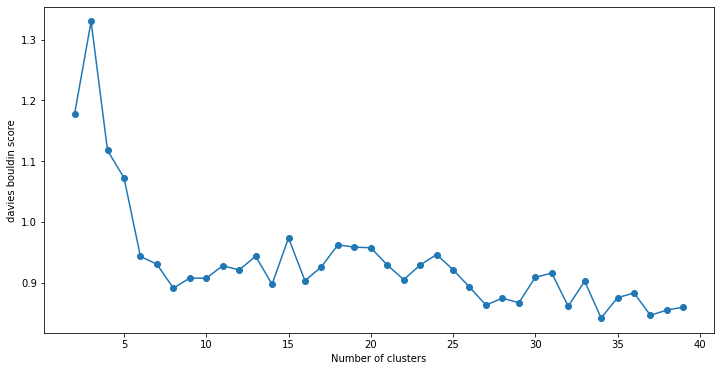

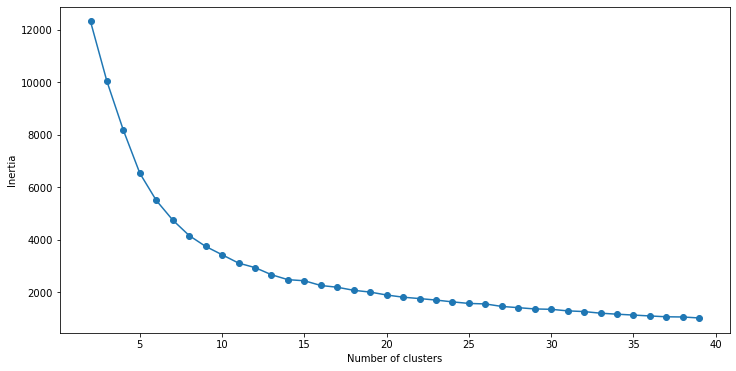

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

errors=[]
inertia=[]

for cluster in range(2,40):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(scaled_data)
    errors.append(davies_bouldin_score(scaled_data,kmeans.labels_))
    inertia.append(kmeans.inertia_)

frame1 = pd.DataFrame({'Cluster':range(2,40), 'SSE':errors})

plt.figure(figsize=(12,6))
plt.plot(frame1['Cluster'], frame1['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('davies bouldin score')
plt.show()

frame2 = pd.DataFrame({'Cluster':range(2,40), 'SSE':inertia})

plt.figure(figsize=(12,6))
plt.plot(frame2['Cluster'], frame2['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [88]:
kmeans=KMeans(8)
kmeans.fit(scaled_data)


KMeans()

In [89]:
customer_details['Labels']=kmeans.labels_

In [90]:
customer_details.score.describe()

count    63904.000000
mean       729.124671
std         62.789186
min          1.000000
25%        712.750000
50%        741.000000
75%        763.000000
max        838.000000
Name: score, dtype: float64

In [91]:
customer_details.groupby('Labels').mean().round()

,city_name,Emp_Type,score,incomeScale,ageScale
Labels,,,,,
0,2.0,2.0,725.0,5.0,4.0
1,3.0,1.0,734.0,4.0,4.0
2,2.0,1.0,733.0,4.0,4.0
3,2.0,2.0,719.0,2.0,4.0
4,1.0,1.0,732.0,4.0,4.0
5,3.0,2.0,726.0,5.0,4.0
6,1.0,2.0,722.0,5.0,4.0
7,3.0,2.0,723.0,2.0,4.0


In [87]:
customer_details.groupby('Labels').count()

,city_name,Emp_Type,score,incomeScale,ageScale
Labels,,,,,
0,7851,7851,7851,7851,7851
1,10193,10193,10193,10193,10193
2,7174,7174,7174,7174,7174
3,14336,14336,14336,14336,14336
4,7355,7355,7355,7355,7355
5,12085,12085,12085,12085,12085
6,4910,4910,4910,4910,4910


In [92]:
data.columns

Index(['pan', 'monthlyIncome', 'Age', 'city_name', 'Emp_Type', 'score',
       'amountPastDue', 'creditLimitAmount', 'currentBalance', 'dateClosed',
       'dateofLastPayment', 'openDate', 'dateReported', 'highCredit', 'Credit',
       'accountTypeName', 'accountStatusName'],
      dtype='object')

In [93]:
data.accountTypeName.unique()

array(['Personal Loan', 'Consumer Loan', 'Auto Loan (Personal)',
       'Credit Card', 'Overdraft', 'Housing Loan',
       'Commercial Vehicle Loan', 'Business Loan General',
       'Property Loan', 'Two-Wheeler Loan', 'Used Car Loan',
       'Prime Minister Jaan Dhan Yojana - Overdraft', 'Other',
       'Microfinance Business Loan', 'Business Loan - Secured',
       '(BLPS-SB) Business Loan – Priority Sector – Small Business',
       'Gold Loan', 'Kisan Credit Card', 'Loan on Credit Card',
       'Microfinance Personal Loan', 'Corporate Credit Card',
       'Mudra Loans – Shishu / Kishor / Tarun', 'Secured Credit Card',
       '(BLPS-AGR) Business Loan – Priority Sector – Agriculture',
       'Education Loan', 'Construction Equipment Loan',
       '(BNFCF-PS-SB) Business Non-Funded Credit Facility – Priority Sector – Small Business',
       'Pradhan Mantri Awas Yojana - CLSS',
       '(BNFCF-GEN) Business Non-Funded Credit Facility – General',
       '(BLPS-OTH) Business Loan – Priori

In [78]:
# act,cl,defa=[],[],[]

# for i in customer_details.pan:
    
#     customer=data[data.pan==i].copy()['accountStatusName']
#     act.append((customer=='Active').sum()/len(customer))
#     cl.append((customer=='Closed').sum()/len(customer))
#     defa.append((customer=='Defaulter').sum()/len(customer))
    
    
    
# customer_details['frActive']=act
# customer_details['frClosed']=cl
# customer_details['frDefaulter']=defa